In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving wine.csv to wine.csv


In [ ]:
import io

wine = pd.read_csv(io.BytesIO(file_uploaded["wine.csv"]))

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
wine.isnull().sum() #결측치가 없는 데이터

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

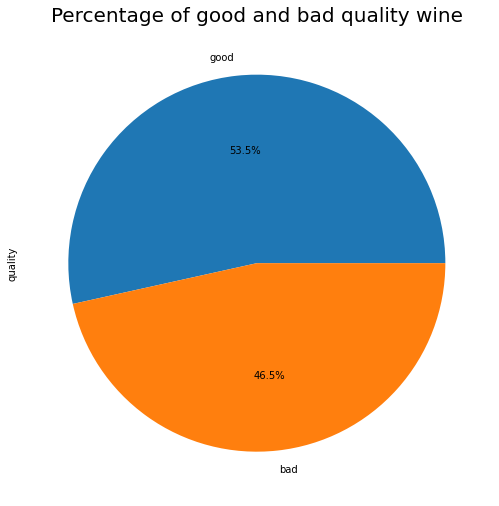

In [ ]:
plt.figure(figsize = (40, 25))
plt.subplots_adjust(left = 0, bottom = 0.5, right = 0.9, top = 0.9,
                    wspace = 0.5, hspace = 0.8)
#adjust the subplot layout parameters
plt.subplot(141) # 1 X 4 grid, first subplot
plt.title('Percentage of good and bad quality wine', fontsize = 20)
wine['quality'].value_counts().plot.pie(autopct = "%1.1f%%")
#autopct: 파이차트 안에 표시될 숫자의 형식 지정, 소수점 한 자리까지 표시

In [ ]:
wine['quality'].replace({'bad': 0, 'good': 1}, inplace = True)
#inplace = True => 변경된 결과를 wine 데이터에 저장해줌

In [ ]:
wine.head()
#quality의 bad은 0으로, good은 1로 바뀐 것을 확인 가능

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
Y = wine['quality']
Y #target data인 wine quality를 Y에 할당해줌

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
X = wine.drop(['quality'], axis = 1)
#target data인 wine quality를 drop해줌
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(X)

In [ ]:
pd.DataFrame(training_set_scaled)
#특성변수별로 단위가 다르기 때문에 표준화 실시

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, Y, test_size = 0.2, random_state = 23)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15), 
                    activation='relu', solver='adam', max_iter=1000)
#Multi-layer Peceptron classifier: This model optimizes the log-loss function 
#using LBFGS or stochastic gradient descent.
##activation: activation function for the hidden layer
###‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
##solver: the solover for weight opitmization
###‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=1000)

In [ ]:
y_pred = mlp.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_train,predict_train)
print(confusion_matrix(y_train,predict_train))
#563개의 TN(Actual: negative, predicted: negative)
#35개의 TP(Actual: positive, predicted: positive)
#56개의 FN(Actual: positive, predicted: negative)
#625개의 FP(Actual: negative, predicted: positive)
print(classification_report(y_train,predict_train))
#classification_report: Build a text report showing the main classification metrics.
##precision: positive라고 예측한 것 중에 실제 positive의 비율
##recall: positive중에 positive라고 예측한 것의 비율
##support: 각 라벨의 실제 샘플 개수(1279개 중 0(bad)이 598개, 1(good)이 681개)
##f1-score: precision과 recall의 조화평균
##macro avg: 평균의 평균을 내는 개념
###(0.91 + 0.95)/2 = 0.93, (0.94 + 0.92)/2 = 0.93, (0.93 + 0.93)/2 = 0.93
##weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균을 내서 계산(샘플의 개수가 적은 클래스의 영향력 감소)
###((598/1279) * 0.91 + (681/1279) * 0.95)/2 = 0.93, ((598/1279) * 0.94 + (681/1279) * 0.92)/2 = 0.93
##결론적으로 성능이 괜찮은 분류모델로 판단됨

[[563  35]
 [ 56 625]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       598
           1       0.95      0.92      0.93       681

    accuracy                           0.93      1279
   macro avg       0.93      0.93      0.93      1279
weighted avg       0.93      0.93      0.93      1279



In [ ]:
mlp.predict([[7.4,	0.700,	0.00,	1.9,	0.076,	11.0,	34.0,	0.99780,	3.51,	0.56,	9.4]])

#fixed acidity = 7.4, volatile acidity = 0.7, citric acid = 0	,residual sugar = 1.9,	
#chlorides = 0.076, free sulfur dioxide = 11, total sulfur dioxide = 34,	
#density = 0.99780, pH = 3.51, sulphates = 0.56, alcohol = 9.4
#인 wine의 경우 0, 즉 bad wine으로 분류됨

array([0])

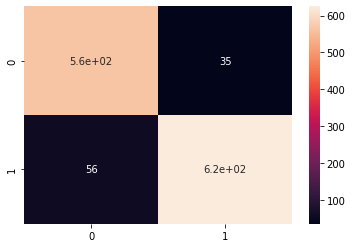

In [ ]:
sns.heatmap(cf_matrix, annot=True)
#위의 confusion matrix를 heatmap을 이용하여 시각화
#annot = True를 하면 각 셀의 값을 표기해줌

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


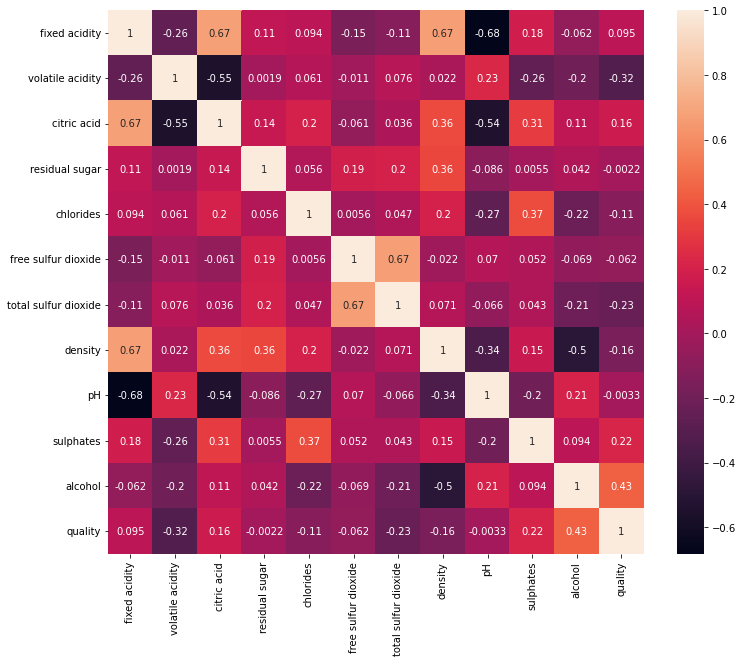

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(wine.corr(), annot = True)
#상관계수에 대한 히트맵